### Import Necessary Modules

In [48]:
import os
import sys
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from scipy import stats
import scipy.stats as ss

sns.set(font_scale=2)
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP 1

### Load Data

In [10]:
train_dataset = pd.read_csv('train.csv') # train dataset
test_dataset = pd.read_csv('test.csv') # test dataset
sample_submission = pd.read_csv('sample_submission.csv') # sample file submission

In [11]:
# view train dataset
train_dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [12]:
# Description of dataset
def remove_ID(df, columns : list):
    df.drop(columns = columns,axis = 1, inplace = True)
    df.head()
    return df

remove_ID(train_dataset, columns = ['Id'])

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [13]:
print(train_dataset.shape) # check the shape of the dataset
train_dataset.describe()

(1460, 80)


MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

Now we have remove our Id feature which is of no use, as it was just telling the id number of the row, and which is a primary key also, and it wasn't effecting our data, so we prefer to remove it, rather than to keep it

Features left after remving Id are : 79

### Analyse Dependent Feature

In [18]:
## description of dependent feature
train_dataset['SalePrice'].describe()

## min price of house : 34900.000000
## max pirce of house : 755000.000000

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

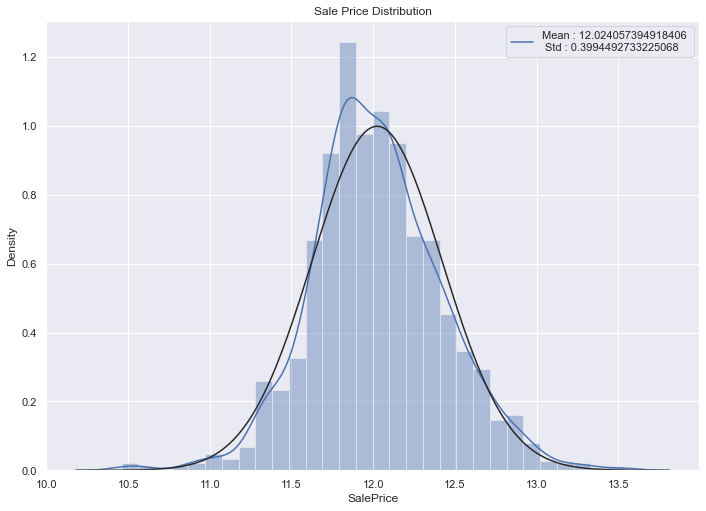

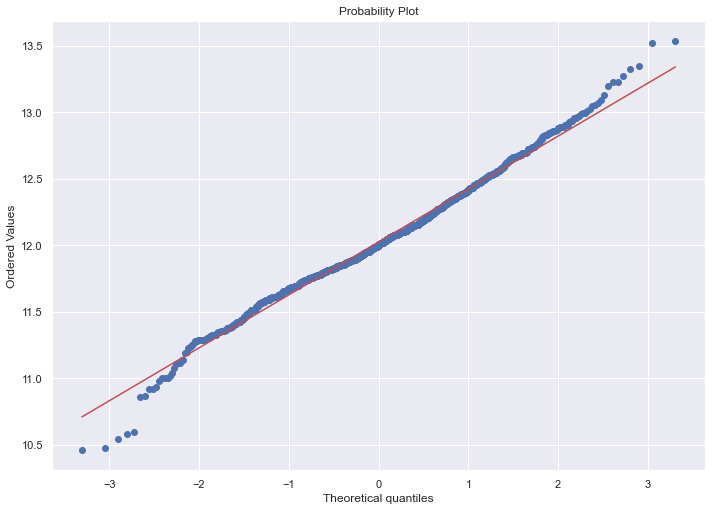

Skewness : 0.12134661989685333
Mean : 12.024057394918406
Median : 12.001511614739405
Median : 11.849404844423074


In [49]:
# Now, we will handling our dependent feature i.e, salesprice feature which is our output feature as well.

# we are creating the histogram of our dependent variable because we know that it is a regresssion task, and we want that
# our output feature must be in normal distribution. If we want to solve any regression task especially using linear model
# we need that our output feature will be in normal distribution
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train_dataset['SalePrice'], bins = 30, fit = ss.norm)
plt.title("Sale Price Distribution")

# calculate mean and std of the sales price
mean = train_dataset['SalePrice'].describe()[1]
std = train_dataset['SalePrice'].describe()[2]

plt.legend(["Mean : {} \n Std : {}".format(mean, std)], loc = 'best')
plt.show()

# plot QQ Plot to check for skewness
result = stats.probplot(train_dataset['SalePrice'], plot = plt)
plt.show()
print("Skewness : {}".format(train_dataset['SalePrice'].skew()))
print("Mean : {}".format(mean))
print("Median : {}".format(np.median(train_dataset['SalePrice'])))
print("Median : {}".format(stats.mode(train_dataset['SalePrice'])[0][0]))

In the above histogram we can visualize the blue and the black line, blue line represent the actual data, and black line represent the norm data, here is a twist, here we can see that there is some skewness in the data, and now we have to handle the skewness of the data, and make it symmterical and with 0.0 skewness.

### Skewness

Skewness esentially measures the symmetry of the distribution of the curve. Skewness is the degree of asymmetry observed in the probability distribution that deviates from the symmetrical normal distribution of the data.

The normal distribution helps us to know about the skewness in the data. In the normal distribution plot, the data is symmetrical. The symmetrical distribution has zero skewness. i.e., mean = median = mode = 0. if the normal distribution plot is asymmetrical, at that time skewness comes into picture.

* Note : If the values of a feature are skewed, depending on the model, skewness may violate model assumptions or may reduce the interpretation of feature importance.

#### Types of Skewness
- 1 : Postive or right skewness
        In this type of distribution where mean, median and mode are +ve rather than -ve or zero. generally mean > median > mode (It means that most of the data is bent over lower side of plot). This type of skewness isn't desirable for distribution as it may leads to the wrong results. We can solve this problem by transformimg our data into its log form. We will convert our data into its natural logarithmic form.

- 2 : Negative or left skewness
        This is just an opposite of positive skewness, mean, median and mode are -ve rather than +ve or zero. generally mean < median < mode.
        
### Calculate skewness
There are 2 methods to calculate the skewness:
- Pearson’s first coefficient of skewness
    $$ = \frac{(Mean - Mode)}{(Standard deviation)}$$
    Range  : -1 to +1
    If the mode is very high or very low mode, this method is not preferred
- Pearson’s second coefficient of skewness
    $$ = \frac{3(Mean - Median)}{Standard deviation)}$$
    Range : 
       - -0.5 to +0.5 the data is symmetrical
       - -1 to -0.5 -ve skewed
       - 0.5 to 1 +ve skewed.

### Kurtosis

It refers to the degree of outliers in the data.Kurtosis is a statistical measure, whether the data is heavy-tailed or light-tailed in a normal distribution. 

##### Excess Kurtosis
It is used in statistics and probability to compute the kurtosis with the normal distribution. It can be +ve, -ve or 0. 
* Note : Normal distribution has kurtosis = 3. 
$$ Excess Kurtosis = Kurtosis - 3 $$

#### Types of Excess Kurtosis
- +ve or Leptokurtic
    In this Kurtosis > 3, in this case there are more chances of outliers. It indicates that distribution is peaked and possess thick tails. In this case more of the data is located in the tails of distribution instead of around the mean.
- -ve or Platykurtic
    In this Kurtosis < 3, having a lower tail and stretched around center tails means most of the data points are present in high proximity with mean.
- Zero or Mesokurtic
    In this Kurtosis = 3, It is just the normal distribution.

- Logarithmic Transformation of Data

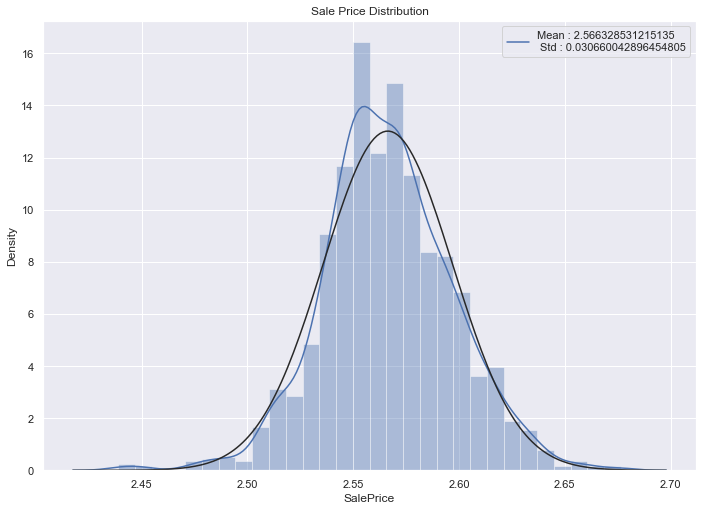

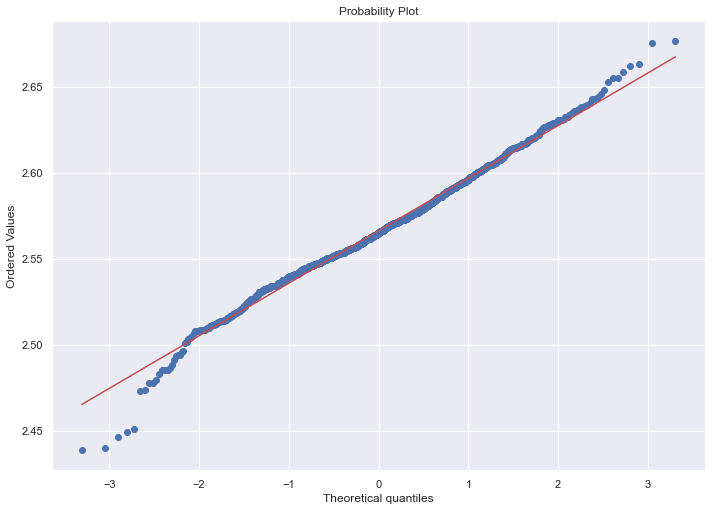

Skewness : -0.00922874059690396
Mean : 2.566328531215135
Median : 2.565065628758645
Median : 2.5532974946595286


In [50]:
# Clearly we can see that skewness is > 0.5 and mean > median > mode, which represent that it is +ve skewness in the data
# we can solve this by using log transformation of data

# convert the data into its log form
train_dataset['SalePrice'] = np.log1p(train_dataset['SalePrice'])

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train_dataset['SalePrice'], bins = 30, fit = ss.norm)
plt.title("Sale Price Distribution")

# calculate mean and std of the sales price
mean = train_dataset['SalePrice'].describe()[1]
std = train_dataset['SalePrice'].describe()[2]

plt.legend(["Mean : {} \n Std : {}".format(mean, std)], loc = 'best')
plt.show()

# plot QQ Plot to check for skewness
result = stats.probplot(train_dataset['SalePrice'], plot = plt)
plt.show()
print("Skewness : {}".format(train_dataset['SalePrice'].skew()))
print("Mean : {}".format(mean))
print("Median : {}".format(np.median(train_dataset['SalePrice'])))
print("Median : {}".format(stats.mode(train_dataset['SalePrice'])[0][0]))

Now we can see that mean median and mode are nearly equall to each other and skewness ~ 0, so we can assume that our data is skew free.

### CoRelation 

Now we check for the co-relation between the features with respect to our dependent features.

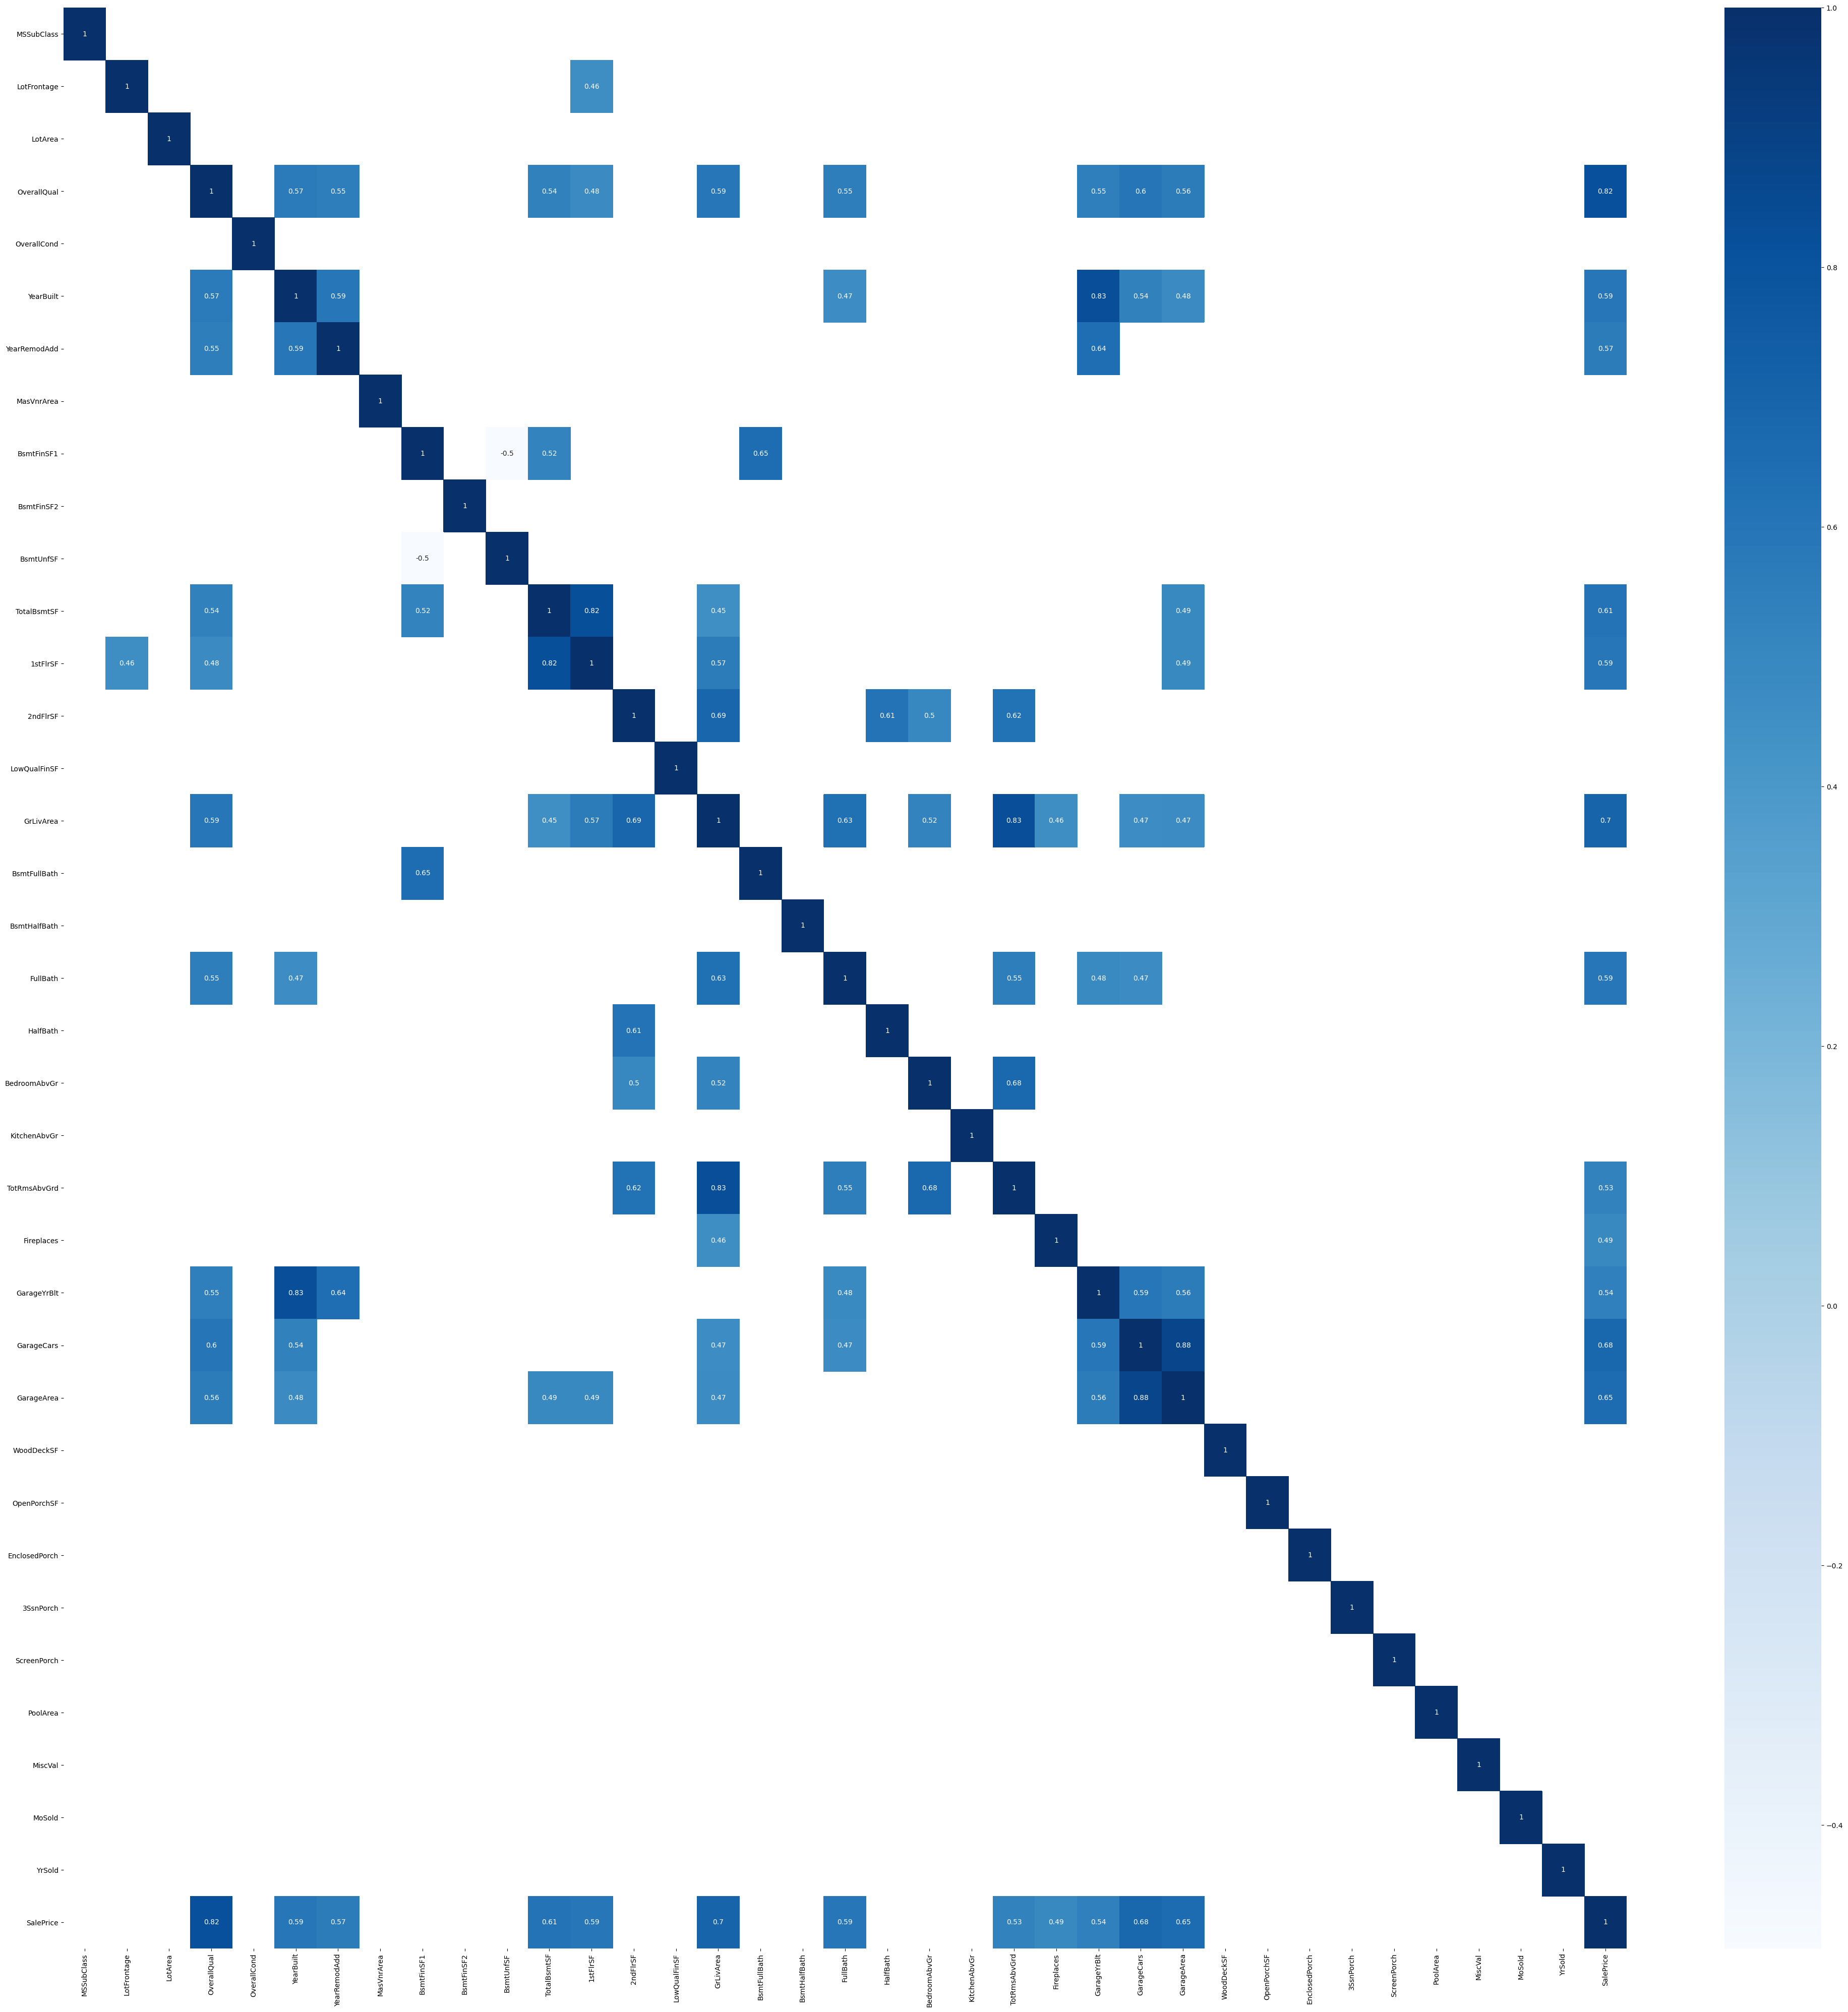

In [53]:
corelation_matrix = train_dataset.corr()

corelation_matrix
# plot the heatmap of co-relation matrix to visualize the graph, and select the features.
plt.figure(figsize = (50,50))
sns.reset_defaults()
# It will plot only those features which are highly co-related to each other, and which are in use for our model
sns.heatmap(corelation_matrix[(corelation_matrix >= 0.45)|(corelation_matrix <= -0.45)], annot = True,cmap='Blues')
plt.show()
# Here, we can see that co-relation ranges from -1 to 1, 1- highly positive co-related to each other, and -1 represent 
# highly negatively co-related to each other.

# we will choose those features which are highly co-related to each other, it doesn't matter whether they are positive
# or negative, but it should highly co-related with our target variable.

# There may be  some features which are highly co-related to each other but we will not choose those 
# features because our linear regression model checks for multi-collinearity. 
# and multi-collinearity results in unstable parameter which makes it very difficult to assess 
# the effect of independent variables on dependent variables.

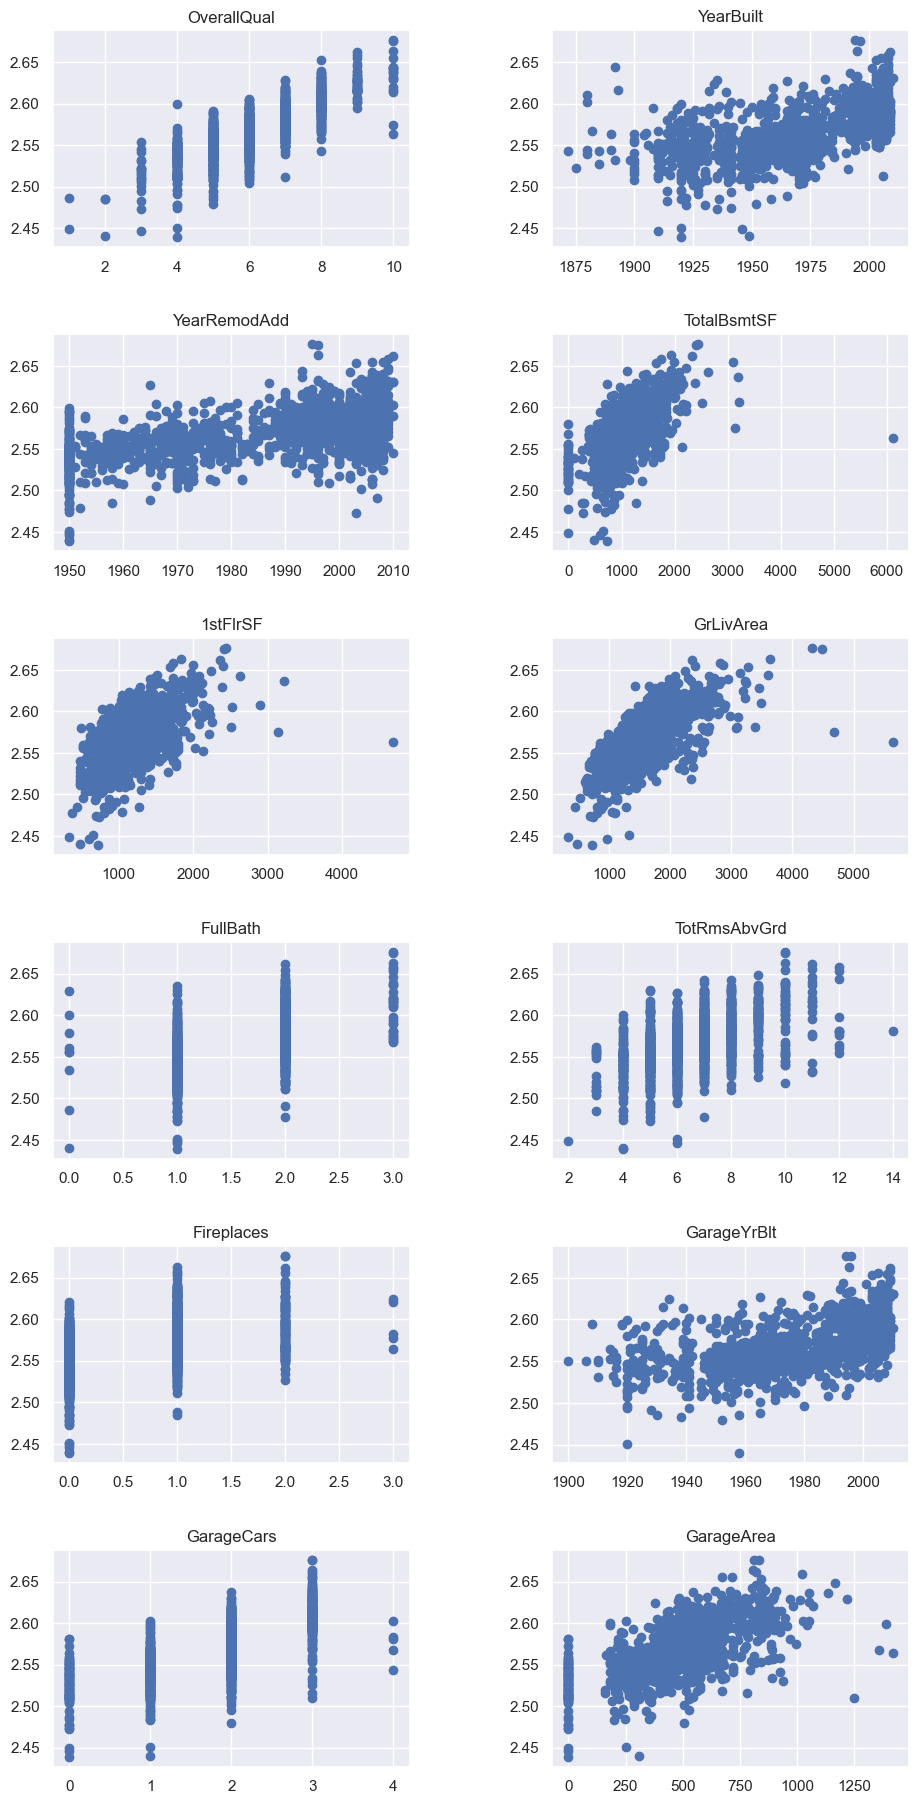

In [82]:
# Features that are highly co-related to our 'SalePrice' features are : 
features_highly_co_related = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','SalePrice']
sns.set(rc={'figure.figsize':(10.7,8.27)})

fig, axes = plt.subplots(6,2)

axes[0,0].scatter(train_dataset[features_highly_co_related[0]], train_dataset['SalePrice'])
axes[0,0].set_title(features_highly_co_related[0])
axes[0,1].scatter(train_dataset[features_highly_co_related[1]], train_dataset['SalePrice'])
axes[0,1].set_title(features_highly_co_related[1])
axes[1,0].scatter(train_dataset[features_highly_co_related[2]], train_dataset['SalePrice'])
axes[1,0].set_title(features_highly_co_related[2])
axes[1,1].scatter(train_dataset[features_highly_co_related[3]], train_dataset['SalePrice'])
axes[1,1].set_title(features_highly_co_related[3])
axes[2,0].scatter(train_dataset[features_highly_co_related[4]], train_dataset['SalePrice'])
axes[2,0].set_title(features_highly_co_related[4])
axes[2,1].scatter(train_dataset[features_highly_co_related[5]], train_dataset['SalePrice'])
axes[2,1].set_title(features_highly_co_related[5])
axes[3,0].scatter(train_dataset[features_highly_co_related[6]], train_dataset['SalePrice'])
axes[3,0].set_title(features_highly_co_related[6])
axes[3,1].scatter(train_dataset[features_highly_co_related[7]], train_dataset['SalePrice'])
axes[3,1].set_title(features_highly_co_related[7])
axes[4,0].scatter(train_dataset[features_highly_co_related[8]], train_dataset['SalePrice'])
axes[4,0].set_title(features_highly_co_related[8])
axes[4,1].scatter(train_dataset[features_highly_co_related[9]], train_dataset['SalePrice'])
axes[4,1].set_title(features_highly_co_related[9])
axes[5,0].scatter(train_dataset[features_highly_co_related[10]], train_dataset['SalePrice'])
axes[5,0].set_title(features_highly_co_related[10])
axes[5,1].scatter(train_dataset[features_highly_co_related[11]], train_dataset['SalePrice'])
axes[5,1].set_title(features_highly_co_related[11])

plt.subplots_adjust(left=0.1,
                    bottom=0.9, 
                    right=0.9, 
                    top=3, 
                    wspace=0.4, 
                    hspace=0.4)

Till now, we have seen that our co-related features and remove skewness from our target feature, now we proceed further and see how we can handle the outliers, but before moving forward I want to say that while making plots between target feature and its co-related feature, we can conclude that 'OverallQuad' is most highly co-related with target feature, which shows that if overall quality of house increses then price of house will increase, and other features also related to target feature, and they all are contributing good enough for prediction.

### Outliers

In [131]:
# fisrt we find the kurtosis of each features, and check whose kurt>3, which implies that there is high chances of outliers
def kurt(df):
    kurt_ = list()
    df = df.select_dtypes(exclude = "O")
    for feature in df.columns:
        kurtosis = df[feature].kurt()
        if kurtosis > 3:
            kurt_.append((feature, kurtosis))
    
    return kurt_
k = kurt(train_dataset)
print(len(k))
# k = 17 there are more chances that these 17 features have outliers in it.
# lets see what are those 17 features.
print(k)

17
[('LotFrontage', 17.452867259818404), ('LotArea', 203.24327101886033), ('MasVnrArea', 10.08241731736711), ('BsmtFinSF1', 11.118236291964712), ('BsmtFinSF2', 20.11333754558646), ('TotalBsmtSF', 13.250483281984796), ('1stFlrSF', 5.74584148244079), ('LowQualFinSF', 83.2348166744174), ('GrLivArea', 4.895120580693174), ('BsmtHalfBath', 16.396641945350446), ('KitchenAbvGr', 21.532403840138784), ('OpenPorchSF', 8.490335805910506), ('EnclosedPorch', 10.430765944030428), ('3SsnPorch', 123.66237944970538), ('ScreenPorch', 18.43906784486968), ('PoolArea', 223.2684989181717), ('MiscVal', 701.0033422801193)]


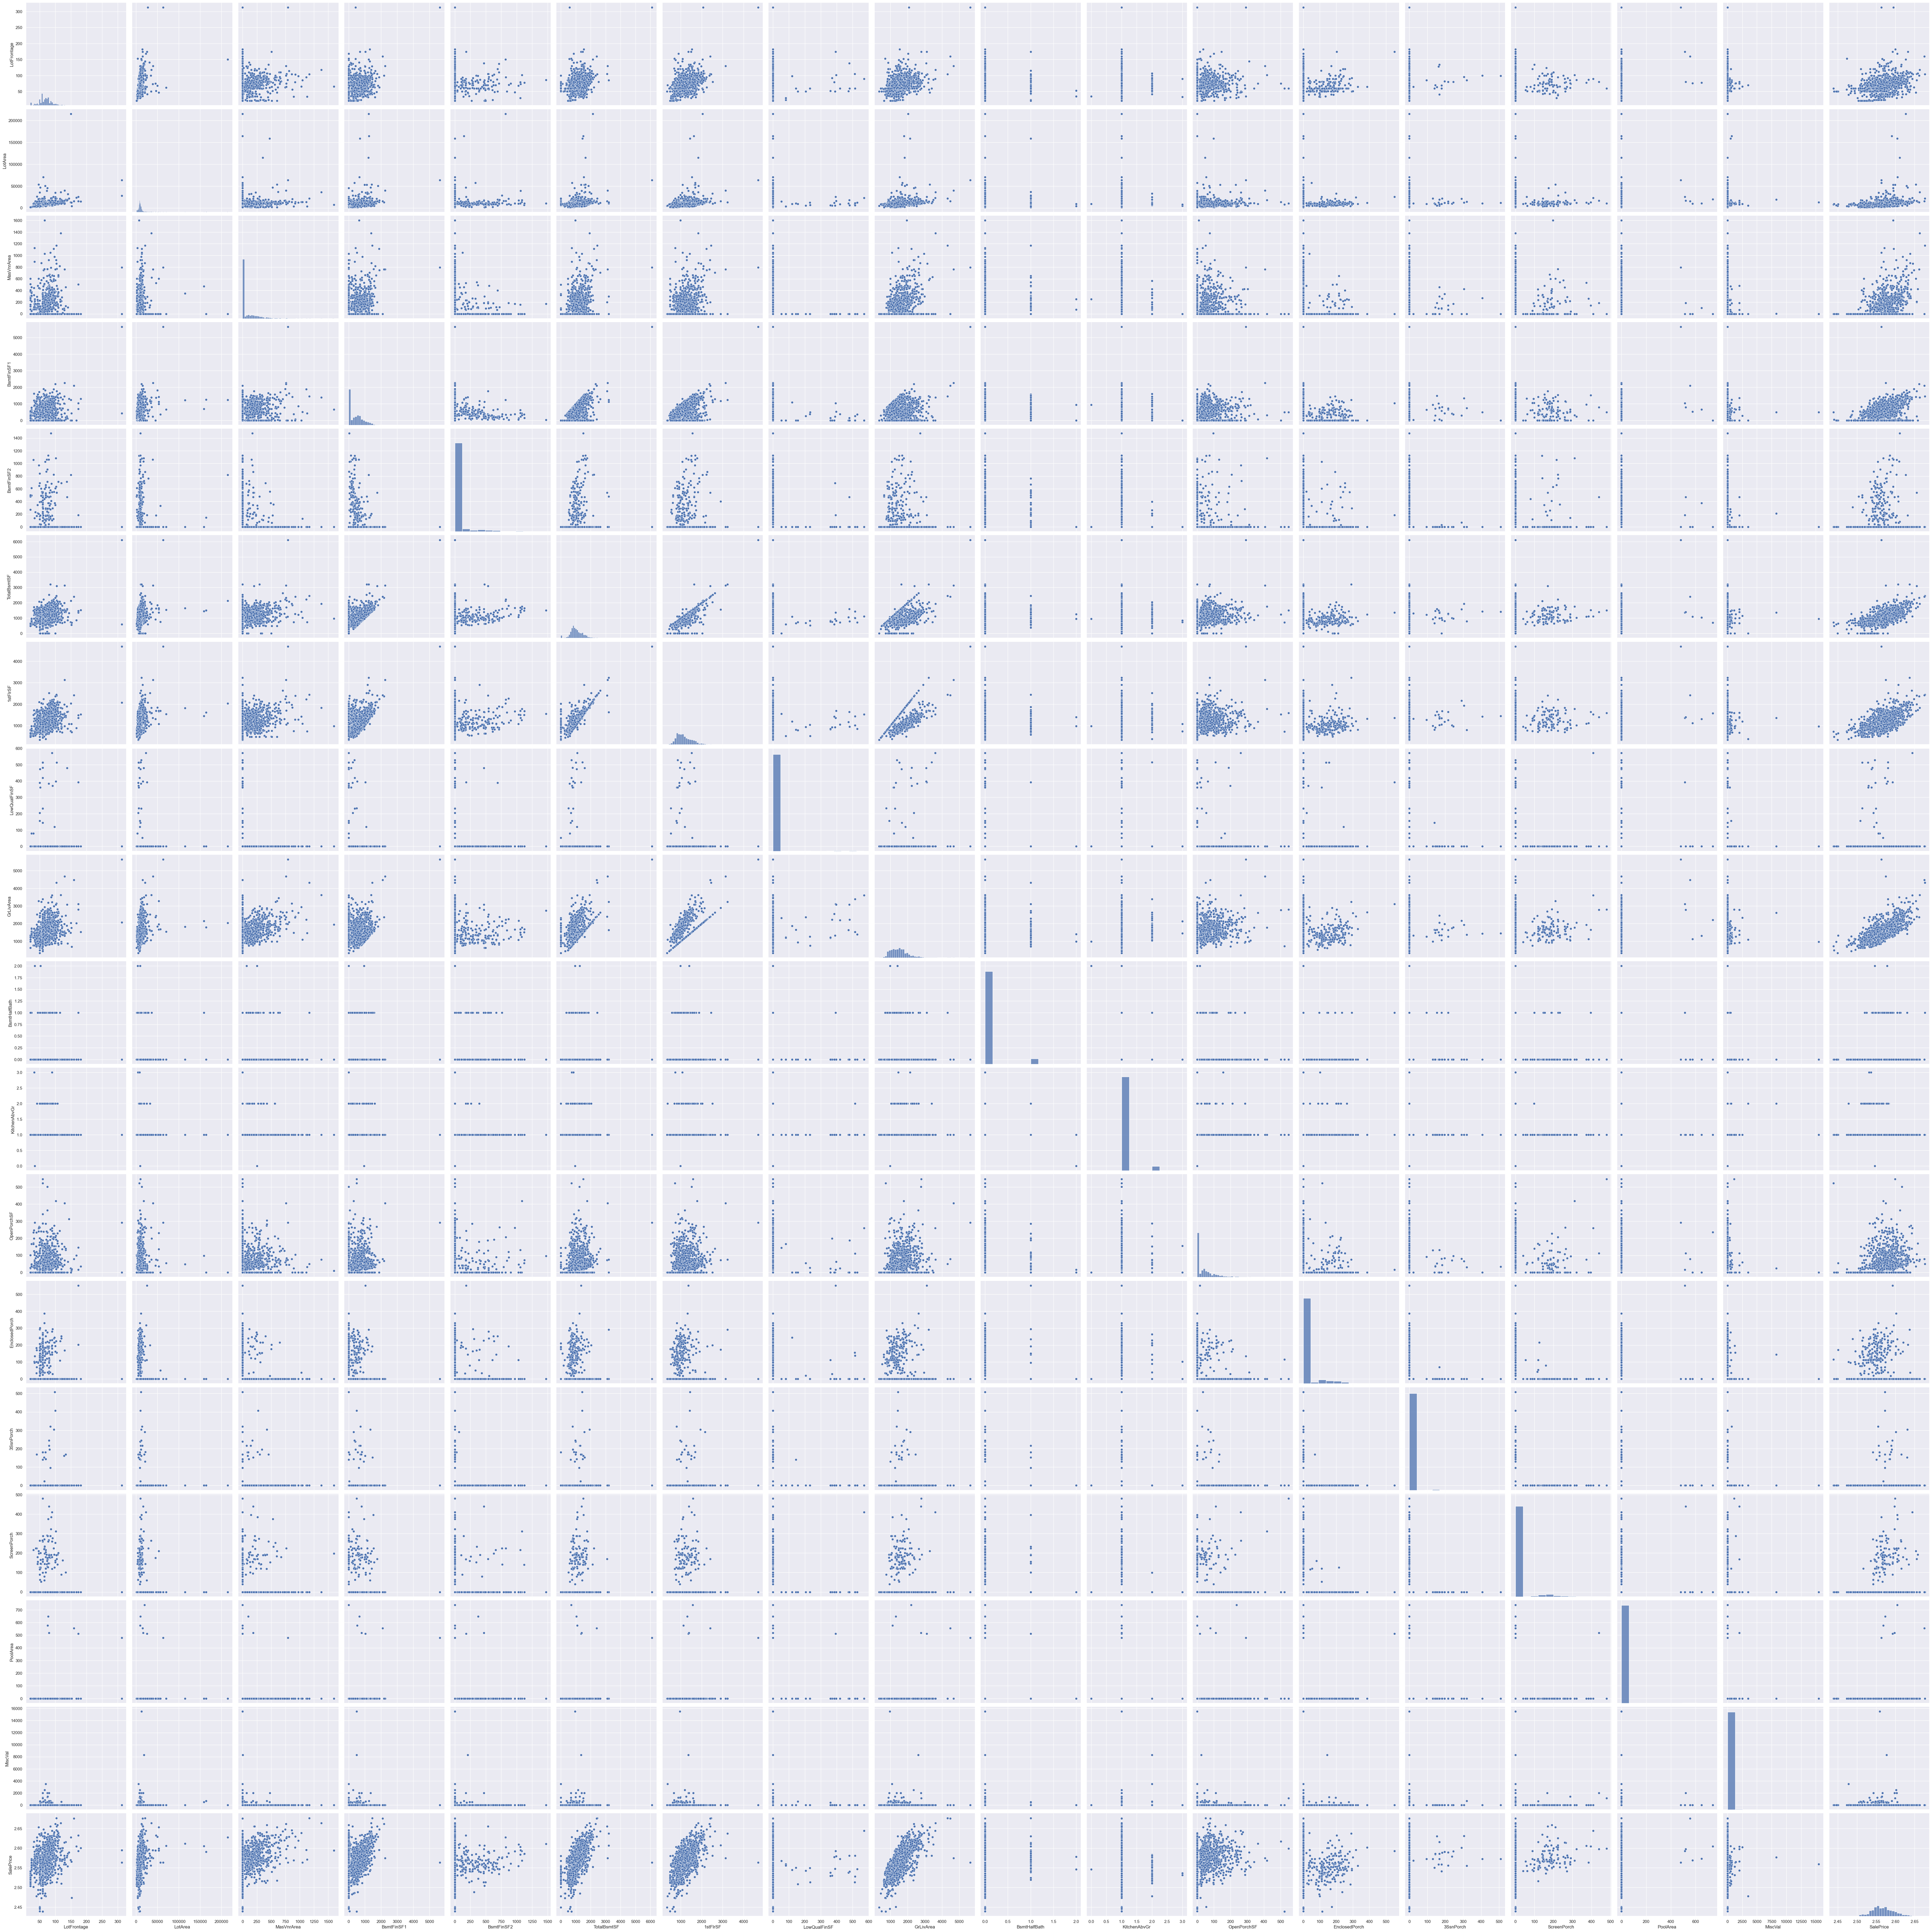

In [155]:
# lets plot the pairplot of all the k features including our target feature
def get_data(df, required_features):
    data = list()
    for feature,_ in required_features:
        data.append(df[feature])
    return data
temp_df = pd.DataFrame(data = get_data(train_dataset,k)).T
temp_df = pd.concat([temp_df,train_dataset['SalePrice']], axis = 1)

sns.set()
sns.pairplot(temp_df, size = 4)

In [156]:
temp_df.shape

(1460, 18)

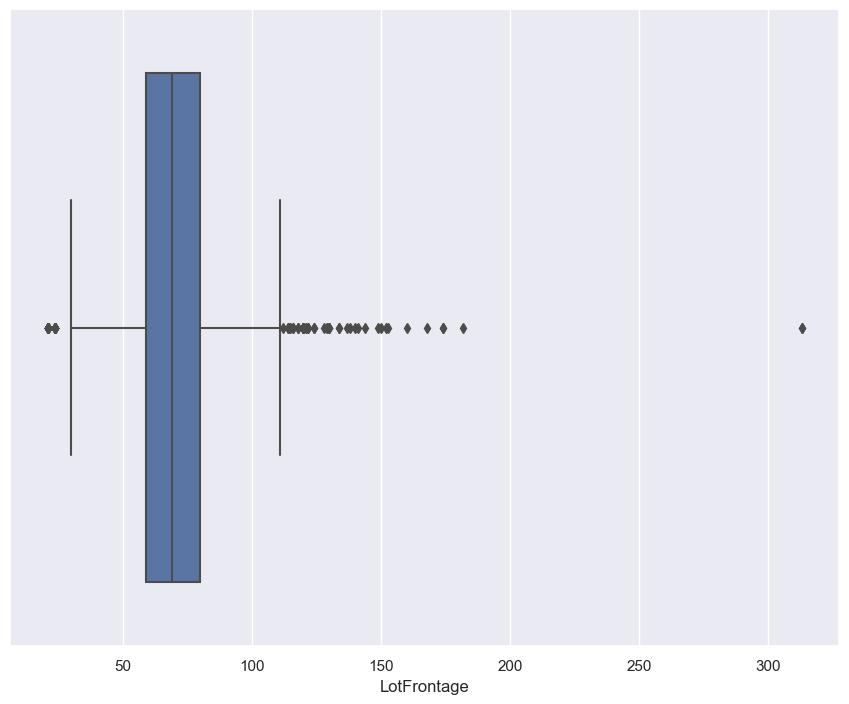

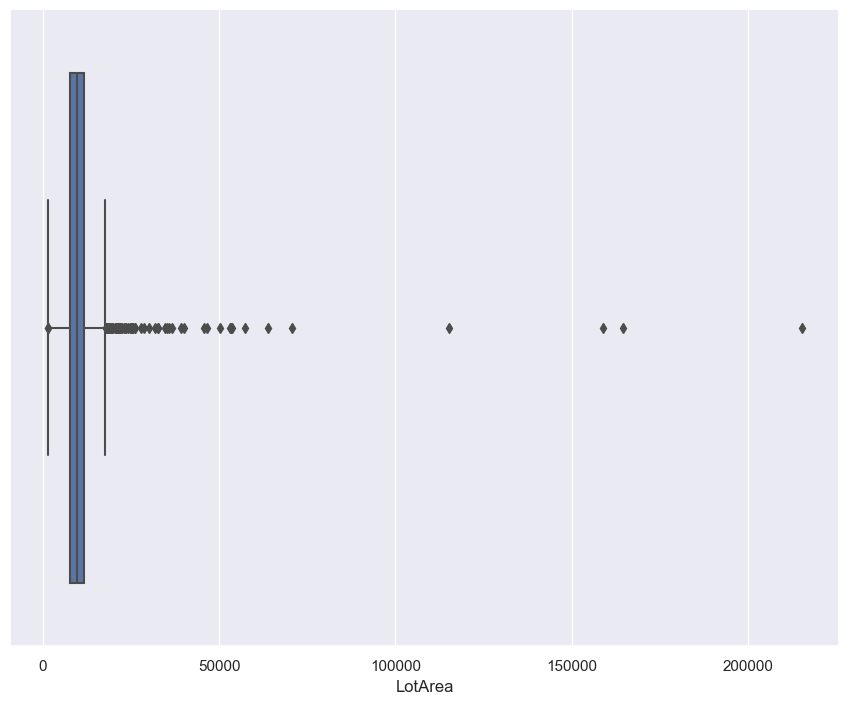

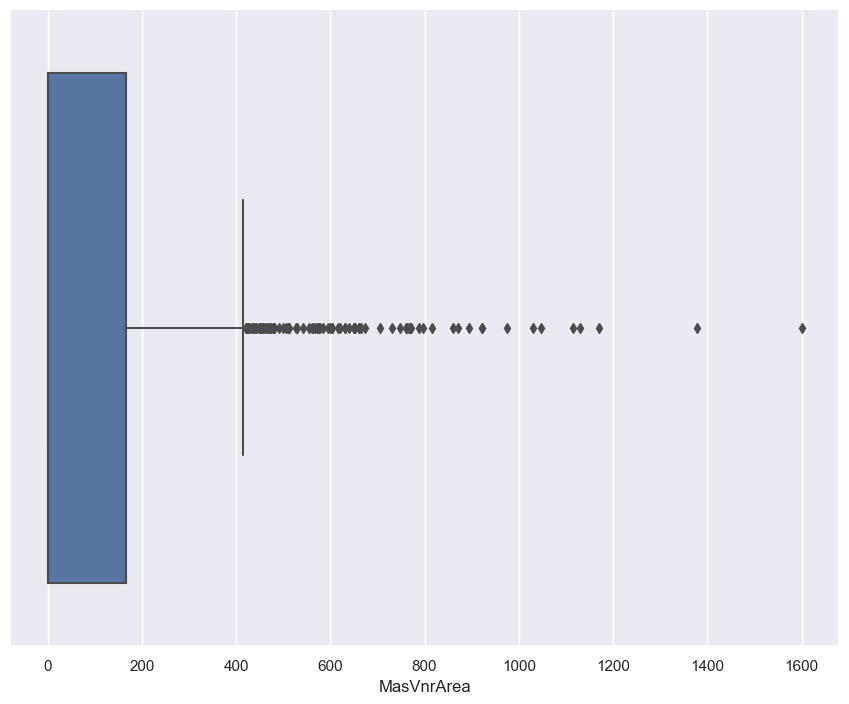

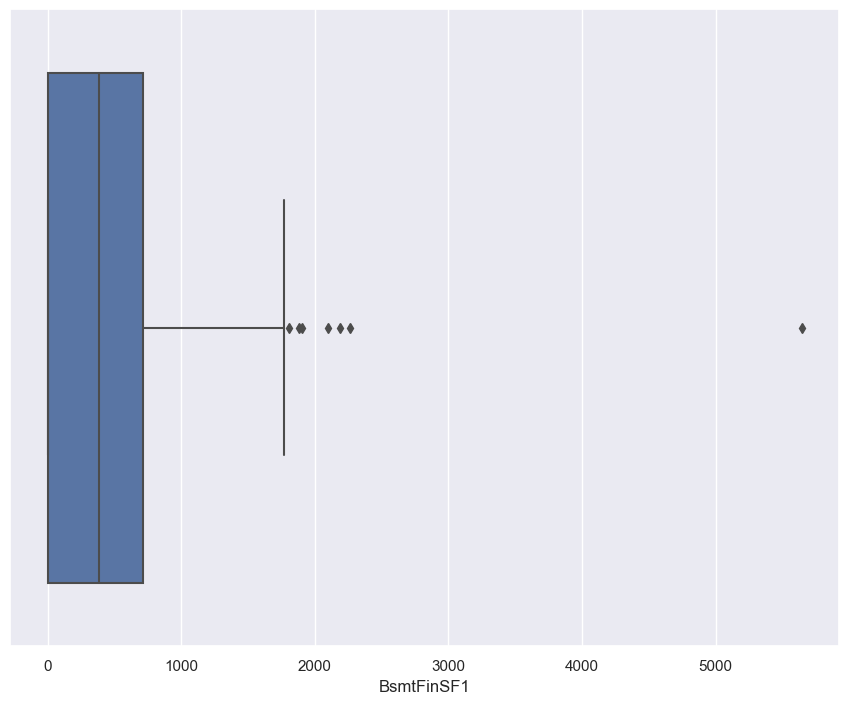

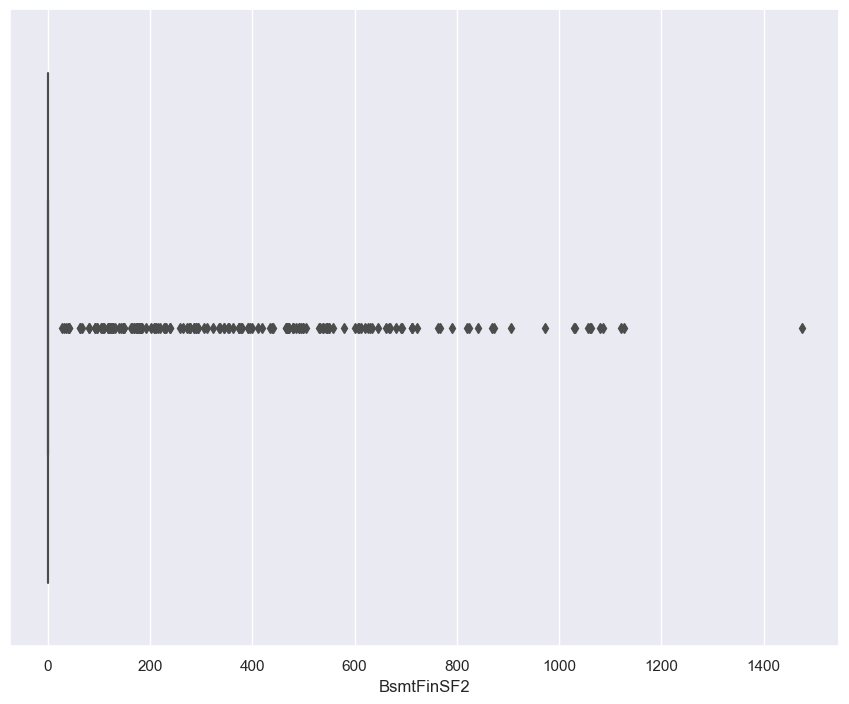

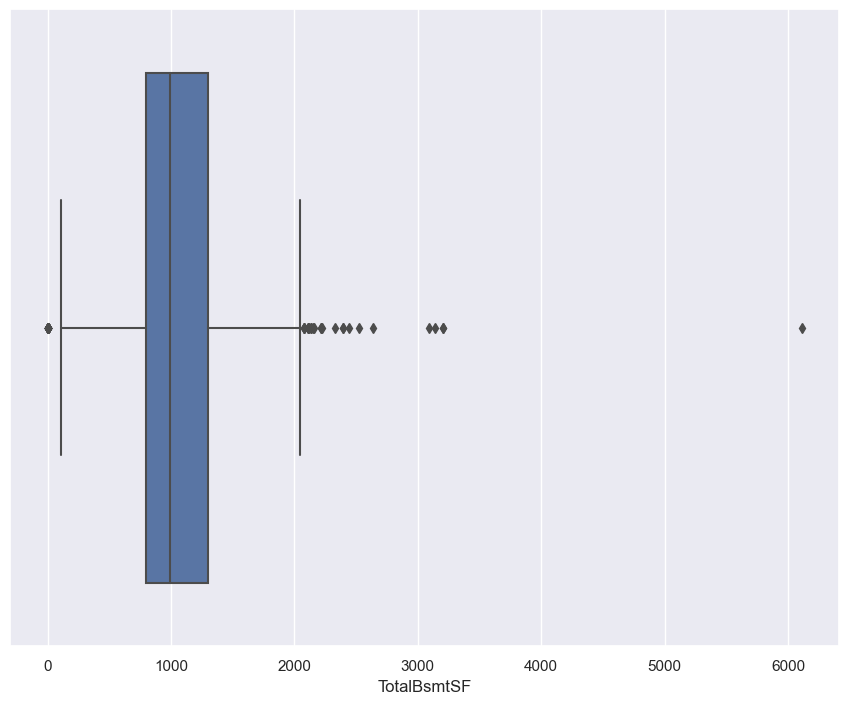

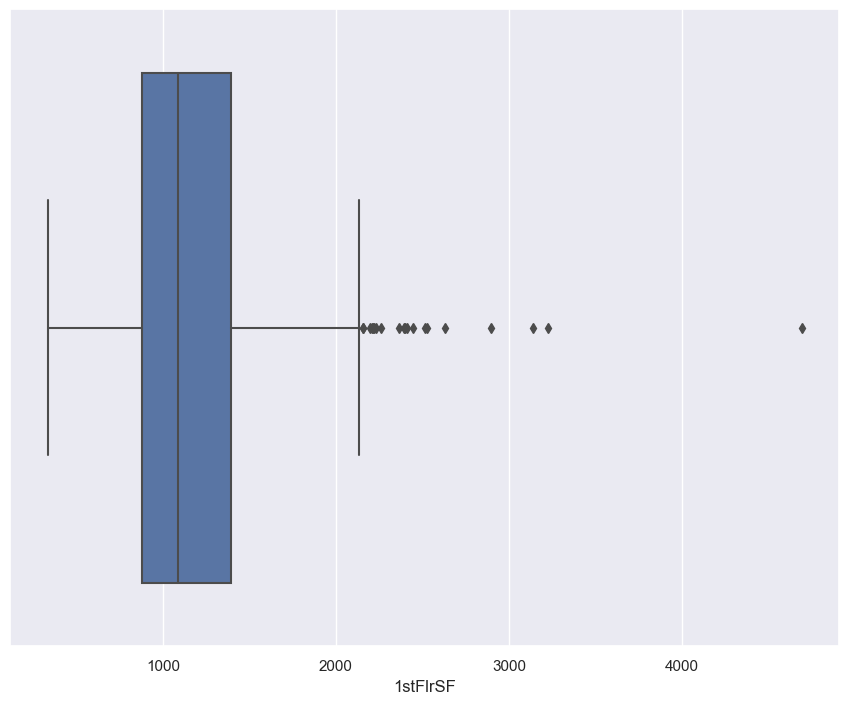

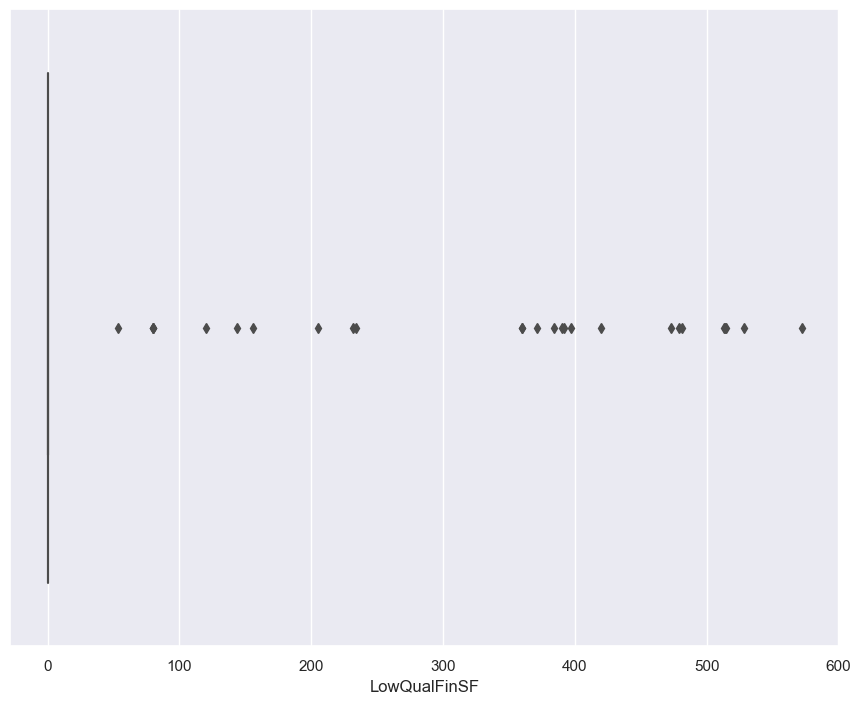

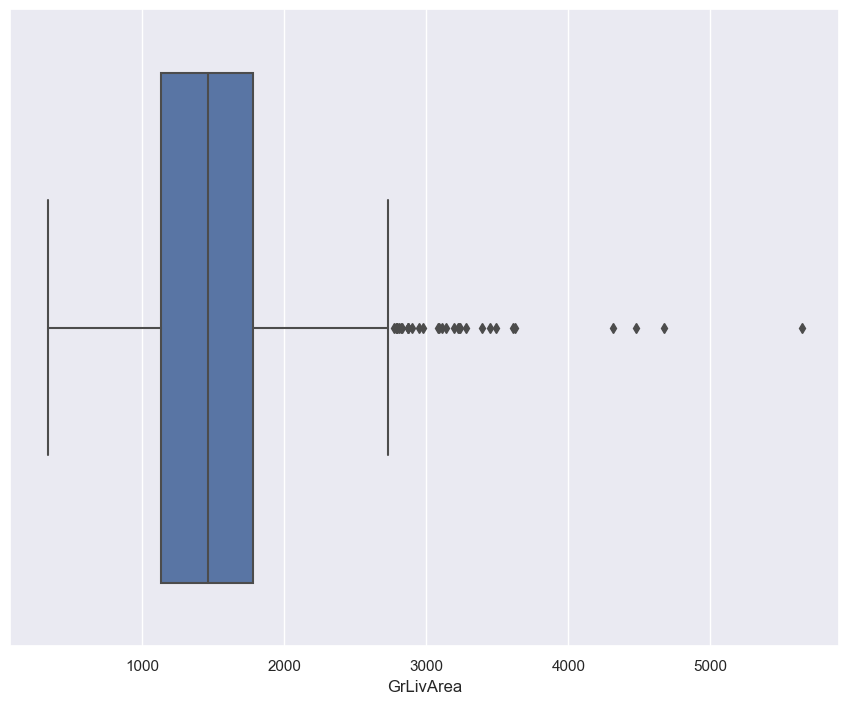

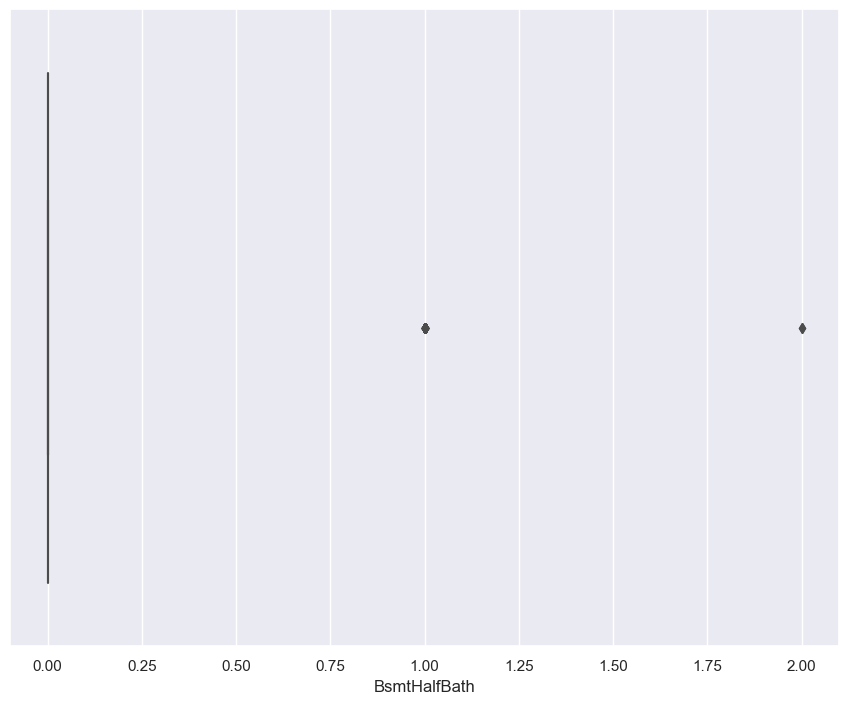

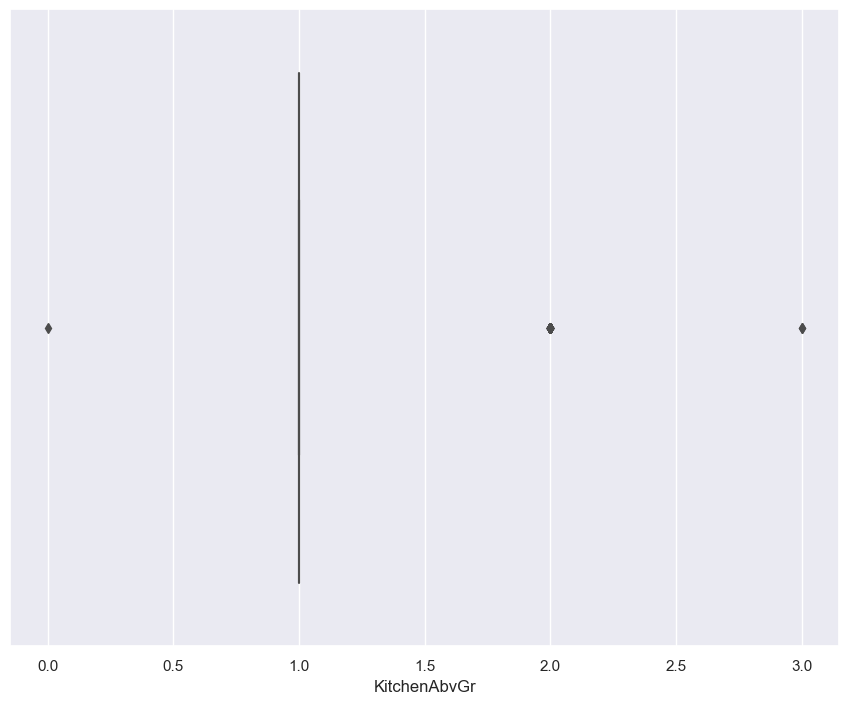

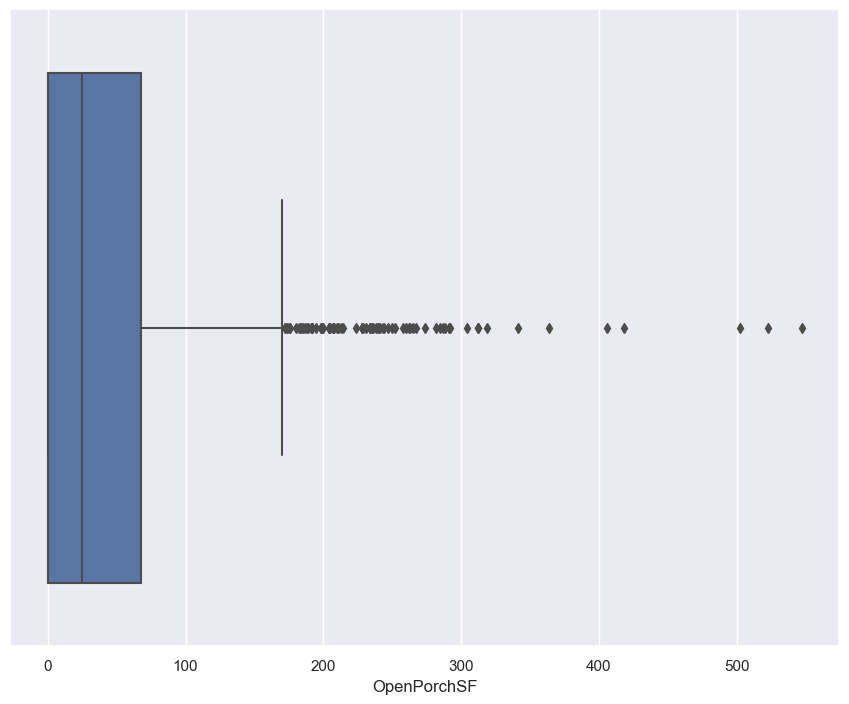

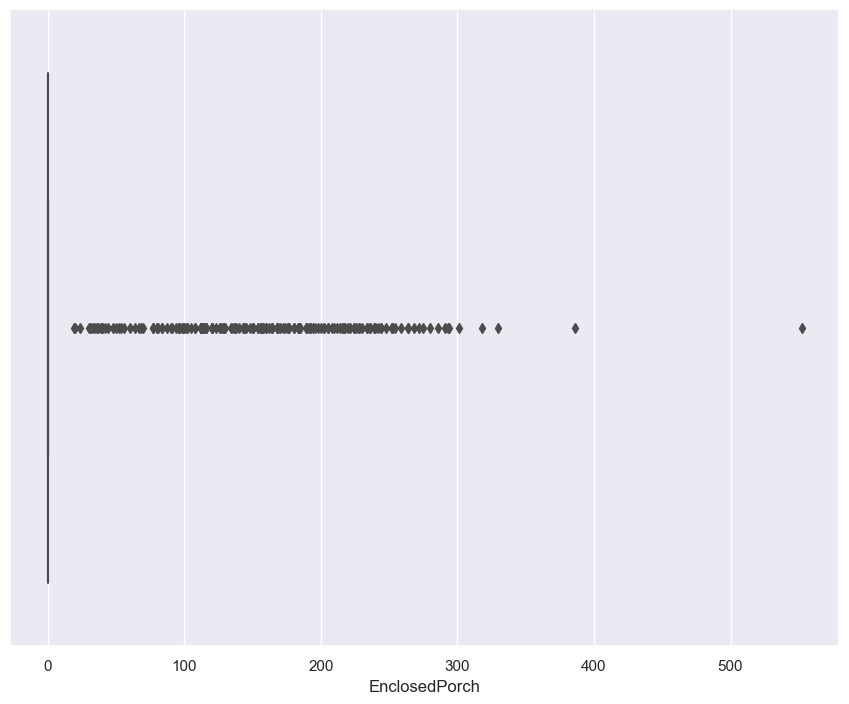

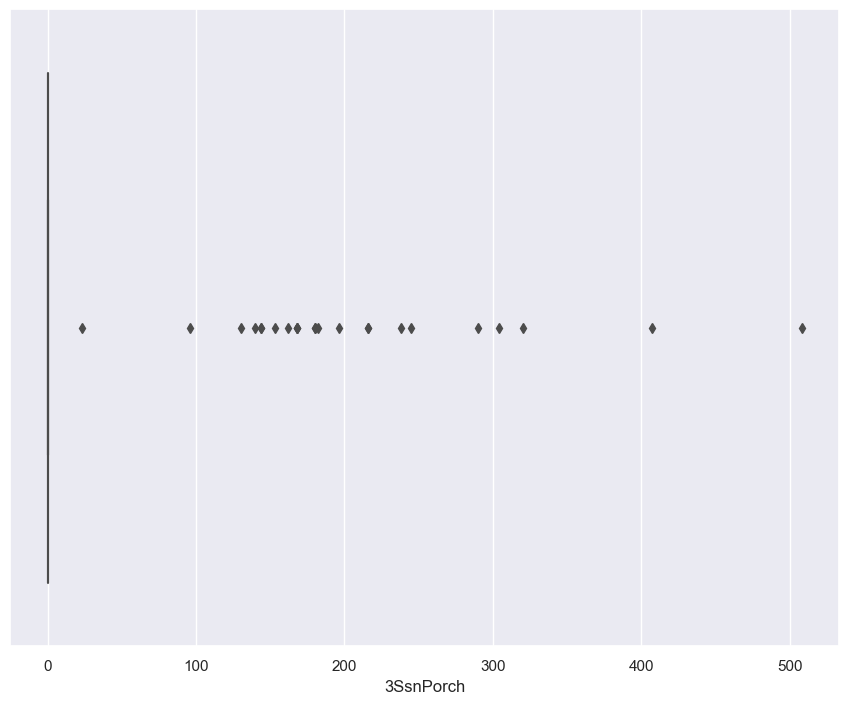

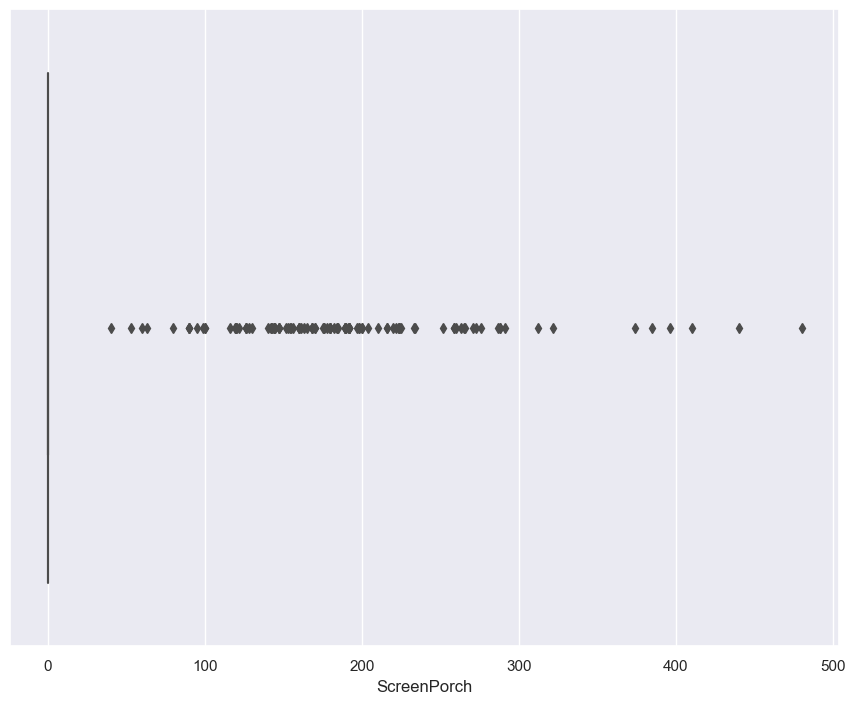

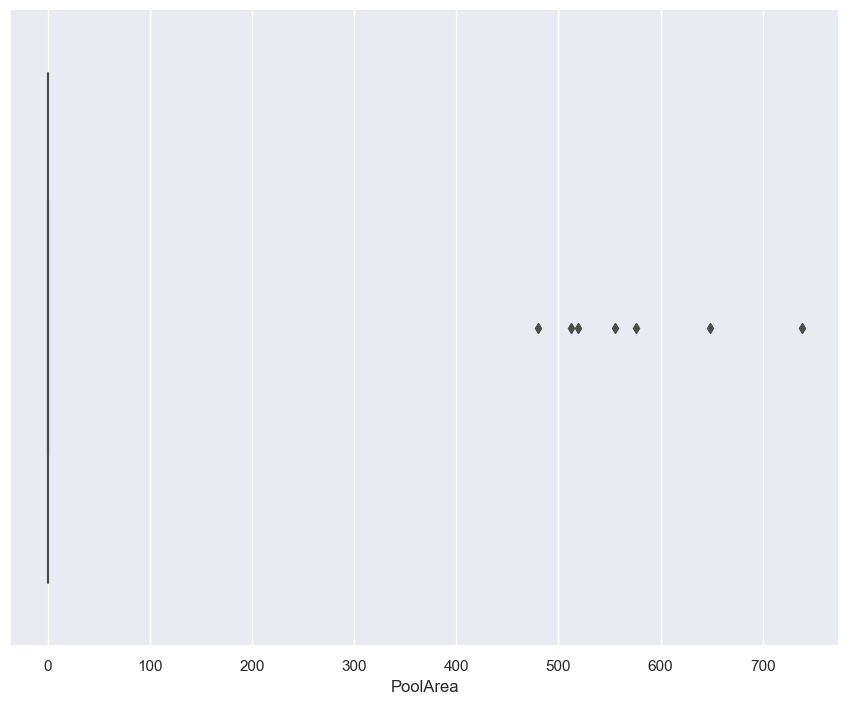

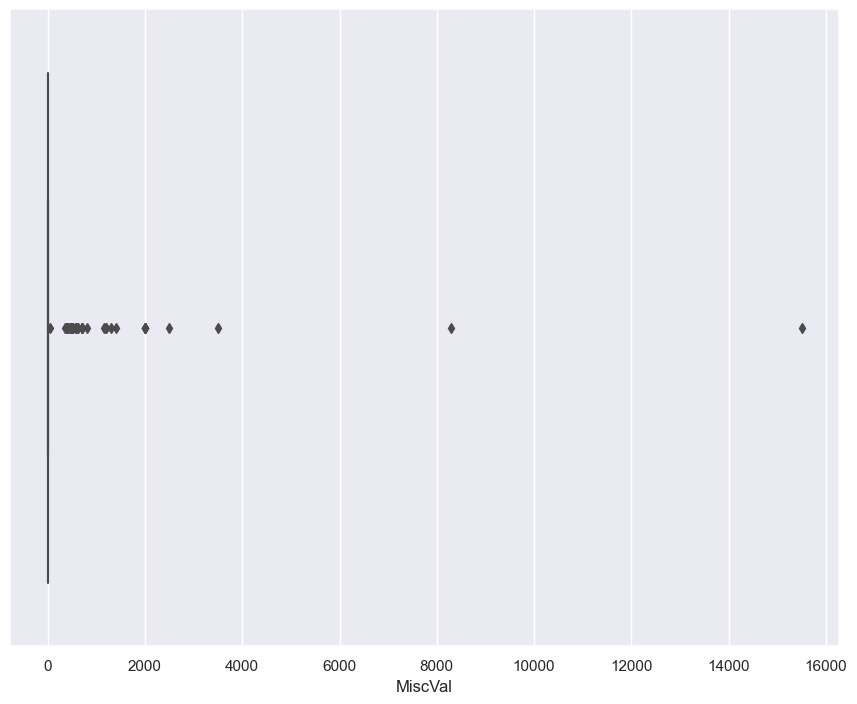

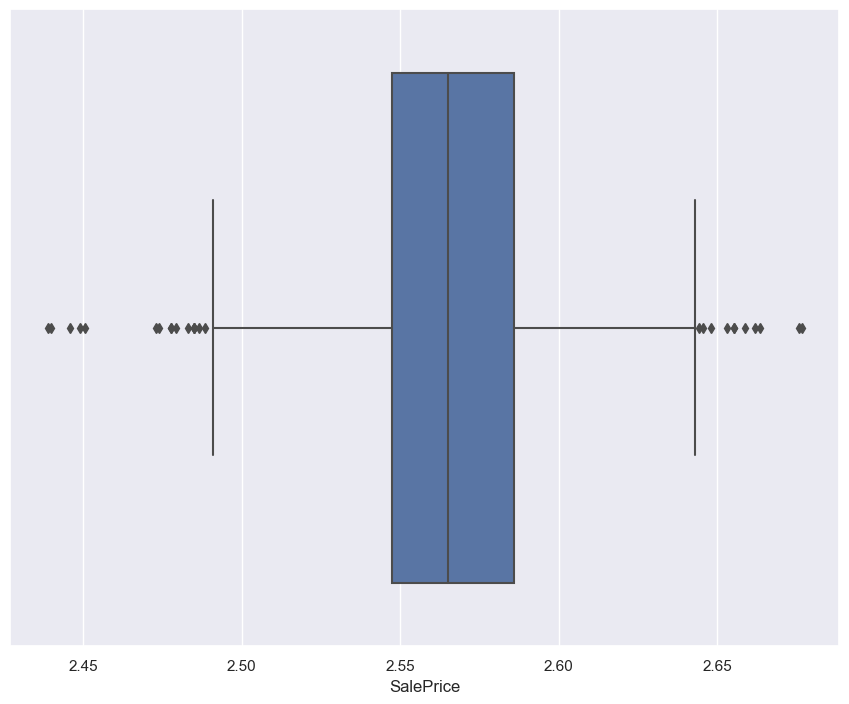

In [157]:
def plotBoxplot(df):
    for i in df.columns:
        sns.boxplot(x = i, hue = 'SalePrice', data = df)
        plt.show()
plotBoxplot(temp_df)

In [161]:
# By viewing the pair we have conclude that the following data points can be removed, which may decrease our accuracy
# LotFrontage > 300, LotArea > 150000, TotalBsmtSF > 5900, GrLivArea > 4000
train_dataset.drop(train_dataset[(train_dataset['LotFrontage']>300) & (train_dataset['SalePrice']>2.55)].index, inplace = True)
train_dataset.drop(train_dataset[(train_dataset['LotArea'] > 150000) & (train_dataset['SalePrice'] >  2.55)].index, inplace = True)
train_dataset.drop(train_dataset[(train_dataset['TotalBsmtSF'] > 5900) & (train_dataset['SalePrice'] >  2.55)].index, inplace = True)
train_dataset.drop(train_dataset[(train_dataset['GrLivArea'] > 4000) & (train_dataset['SalePrice'] >  2.55)].index, inplace = True)

Now we remove all the possible outliers from our dataset, we can plot them and verify them as well so for confirmation, but we will plotting only whose in which outliers are being removed.

Text(0.5, 1.0, 'GrLivArea')

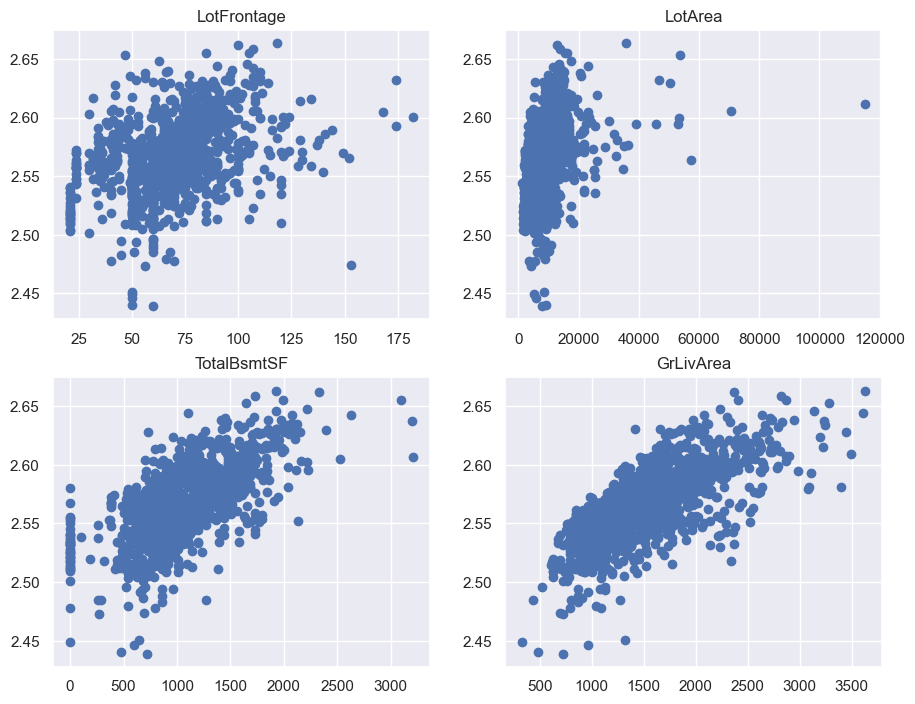

In [166]:
fig, axes = plt.subplots(2,2)

axes[0,0].scatter(train_dataset['LotFrontage'], train_dataset['SalePrice'])
axes[0,0].set_title('LotFrontage')
axes[0,1].scatter(train_dataset['LotArea'], train_dataset['SalePrice'])
axes[0,1].set_title('LotArea')
axes[1,0].scatter(train_dataset['TotalBsmtSF'], train_dataset['SalePrice'])
axes[1,0].set_title('TotalBsmtSF')
axes[1,1].scatter(train_dataset['GrLivArea'], train_dataset['SalePrice'])
axes[1,1].set_title('GrLivArea')
# yes all the outliers are removed from our data, in total there were 8 outliers, and we have successfully remove them. 

### Handling Missing Values

Till now, we have seen various plot of our train dataset, we have handle outliers, learn about skewness and kurtosis, and make normal distribution plot, and much more. But from now onwards we will working on both the dataset i.e., train as well test dataset. In this section, we will see how we will missing values in our dataset.

Till now, we have been working on numerical data, but from now onwards, we will working on both numerical as well as categorical data.

In [346]:
train_dataset.head()

(1452, 79)

In [345]:
test_dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       6    2010        WD         Normal  
1        Gar2   12500       6    2010        WD         Normal  
2         NaN       0       3    2010        WD         Normal  
3         NaN       0       6    2010        WD         Normal  
4         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

In [169]:
# first we remove the ID column, so that we can concat our both the data, and handle the missing values in it.
remove_ID(test_dataset, ['Id'])
test_dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       6    2010        WD         Normal  
1        Gar2   12500       6    2010        WD         Normal  
2         NaN       0       3    2010        WD         Normal  
3         NaN       0       6    2010        WD         Normal  
4         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

In [173]:
# make our y_data
y_data = train_dataset['SalePrice'].values # it will convert our pandas series into numpy array.

In [179]:
# now we will concat our train and test dataset
train_dataset.drop(columns = "SalePrice", inplace = True)
data  = pd.concat([train_dataset, test_dataset], axis = 0)
print(data.shape)
data.head()

(2911, 79)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [343]:
# check for null values
temp = data.isnull().sum()
temp = temp[temp > 0]
temp = pd.DataFrame(temp, columns = ['Null Values'])
temp.reset_index(inplace=True,)
temp

index  Null Values
0  BsmtUnfSF            1

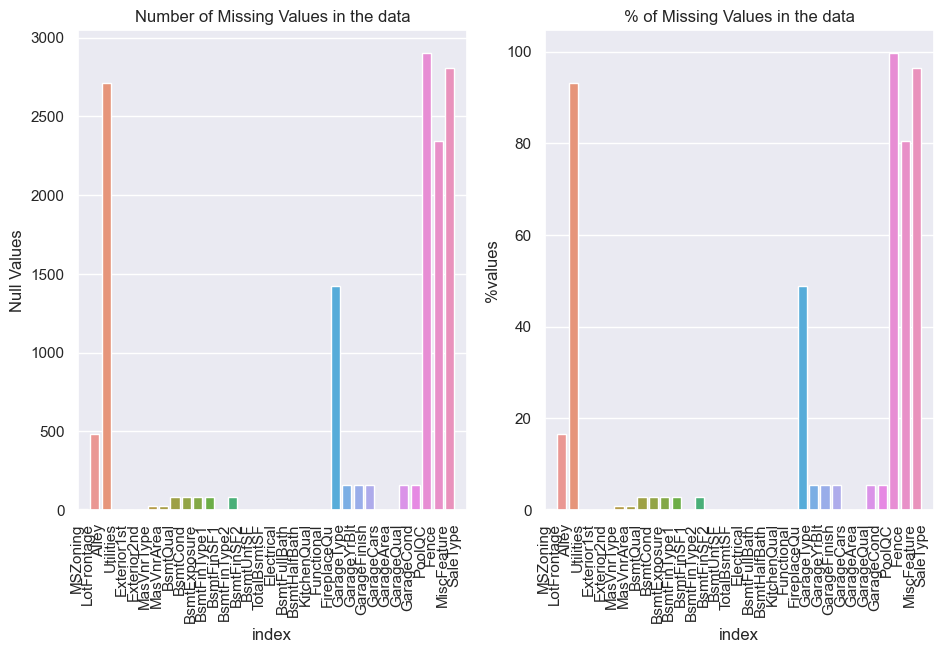

In [266]:
# there are 34 features that contains null values, so there are some categorical as well as numerical fetaures, we will handle every feature seperately

# now, plot how many missing values are there in data with respect to the total data
fig, axes = plt.subplots(1,2)
fig.autofmt_xdate(rotation='90' ) 
sns.barplot(x = 'index', y = 'Null Values', data = temp, ax = axes[0])
axes[0].set_title("Number of Missing Values in the data")
# % of missing values in the data
def percent(df):
    percent_values = list()
    for i in range(df.shape[0]):
        percent_values.append( (int(df.iloc[i][1])/data.shape[0]) * 100 )
        
    df_ = pd.concat([df,pd.Series(percent_values, name = "%values", dtype = float)], axis = 1)
    return df_

temp_ = percent(temp)
sns.barplot(x = 'index', y = '%values', data = temp_, ax = axes[1])
axes[1].set_title("% of Missing Values in the data")

plt.subplots_adjust(left=0.1, bottom = 0.3, wspace = 0.2)

### Description of Features that contains missing Values

- MSZoning: While seeing the data of feature MSZoning, which is a categorical feature, we have seen that 'RL' has maximum count in it, and its probability is high to occur, so its better to use 'RL' in missing values.

- LotFrontage: There are 484 null values, and its a numerical feature, so we can go with mean, median or mode. But which one is to decide, as this feature says that how much distance is to go to the property, so its better to go with median

- Alley: In this type, it is given that if no alley is there we can put it as 'NA'.

- Utilities: In this, everything is available, so it can be fill by 'AllPub'. This feature contains all the identical values, so if we can we can drop it too, because it will contribute nothing to our prediction.

- Exterior1st and Exterior2nd: They both are same, have only one missing value, so we can subsitute the most occuring value in it. 

- 

In [349]:
data['MSZoning'].fillna(value = 'RL', inplace = True)
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))
data['Alley'].fillna(value = 'NA',inplace = True)
data['Utilities'].fillna(value = 'AllPub', inplace = True)
data['Exterior1st'].fillna(value = 'VinylSd', inplace = True)
data['Exterior2nd'].fillna(value = 'VinylSd', inplace = True)
data['MasVnrType'].fillna(value = 'None', inplace = True)
data['MasVnrArea'].fillna(value = 0.0, inplace = True)
data['BsmtQual'].fillna(value = 'NA',inplace = True)
data['BsmtCond'].fillna(value = 'NA',inplace = True)
data['BsmtExposure'].fillna(value = 'NA',inplace = True)
data['BsmtFinType1'].fillna(value = 'NA',inplace = True)
data['BsmtFinType2'].fillna(value = 'NA',inplace = True)
data['BsmtFinSF1'].fillna(value = 0.0, inplace = True)
data['BsmtFinSF2'].fillna(value = 0.0, inplace = True)
data['TotalBsmtSF'].fillna(value = 0.0, inplace = True)
data['Electrical'].fillna(value = 'SBrkr', inplace = True)
data['BsmtFullBath'].fillna(value = 0.0, inplace = True)
data['BsmtHalfBath'].fillna(value = 0.0, inplace = True)
data['KitchenQual'].fillna(value = 'TA', inplace = True)
data['Functional'].fillna(value = 'Typ', inplace = True)
data['FireplaceQu'].fillna(value = 'NA',inplace = True)
data['GarageType'].fillna(value = 'NA',inplace = True)
data['GarageYrBlt'].fillna(value = 0.0,inplace = True)
data['GarageFinish'].fillna(value = 'NA',inplace = True)
data['GarageCars'].fillna(value = 0.0,inplace = True)
data['GarageArea'].fillna(value = 0.0,inplace = True)
data['GarageQual'].fillna(value = 'NA',inplace = True)
data['GarageCond'].fillna(value = 'NA',inplace = True)
data['PoolQC'].fillna(value = 'NA',inplace = True)
data['Fence'].fillna(value = 'NA',inplace = True)
data['MiscFeature'].fillna(value = 'NA',inplace = True)
data['SaleType'].fillna(value = 'WD',inplace = True)
data['BsmtUnfSF'].fillna(value = 0.0,inplace = True)

In [350]:
temp = data.isnull().sum()
temp = temp[temp > 0]
temp

Series([], dtype: int64)